In [ ]:
!pip install --upgrade tensorflow-federated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import tensorflow_federated as tff
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
(train, test) = tff.simulation.datasets.celeba.load_data(
    split_by_clients=True, cache_dir="/content/gdrive/My Drive/CV_data/"
)

In [ ]:
test_ds = test.create_tf_dataset_from_all_clients()

In [ ]:
test_X = test_ds.map(lambda x: x['image'])  # obraz
test_y = test_ds.map(lambda x: 1 if x['wearing_lipstick'] else 0)  # jedna etykieta

In [ ]:
# etykieta
elem = next(iter(test_y))
elem

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
# obraz
elem = next(iter(test_X))
elem

<tf.Tensor: shape=(84, 84, 3), dtype=int64, numpy=
array([[[ 87,  66,  73],
        [ 86,  63,  70],
        [ 91,  66,  72],
        ...,
        [ 70,  65,  95],
        [ 70,  65,  95],
        [ 74,  69,  99]],

       [[ 93,  72,  77],
        [ 91,  68,  74],
        [ 93,  68,  73],
        ...,
        [ 71,  66,  96],
        [ 71,  66,  96],
        [ 75,  70, 100]],

       [[106,  87,  90],
        [106,  86,  88],
        [101,  77,  80],
        ...,
        [ 72,  67,  97],
        [ 71,  66,  96],
        [ 73,  68,  98]],

       ...,

       [[106, 124, 125],
        [104, 124, 124],
        [ 98, 119, 118],
        ...,
        [ 85,  88,  83],
        [ 63,  67,  66],
        [ 98, 104,  97]],

       [[100, 116, 119],
        [ 90, 109, 110],
        [ 91, 111, 112],
        ...,
        [ 69,  74,  68],
        [ 82,  87,  85],
        [117, 124, 115]],

       [[ 92, 106, 111],
        [ 85, 101, 105],
        [ 88, 106, 109],
        ...,
        [ 63,  68,  62]

In [ ]:
import matplotlib.pyplot as plt

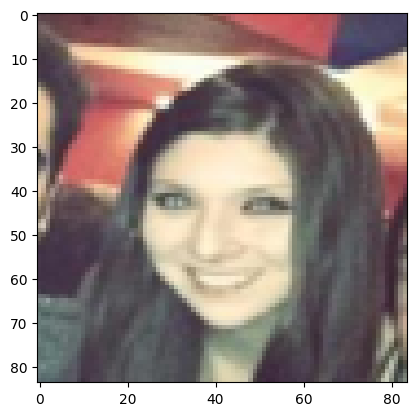

In [ ]:
plt.imshow(elem.numpy())

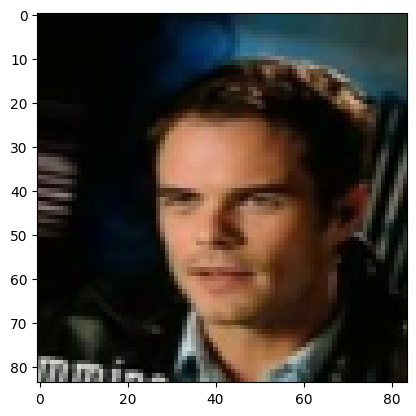

In [ ]:
for elem in test_X.take(10):
  plt.imshow(elem.numpy())

In [ ]:
# stworzenie listy ze wszystkimi obrazami
images = []
for element in test_ds:
  images.append(element['image'].numpy())
